# <center> Tarea semanal 5</center>
### <center> Autores: Arturo Huber, Matias Galperin</center>

## Introducción Teórica

En este trabajo abordaremos el tema de la estimación espectral para señales reales. Para ello, estimaremos la densidad espectral de potencia (PSD), con el objetivo de calcular el ancho de banda efectivo de las señales y analizar cómo se distribuye su energía en el dominio de la frecuencia.

La estimación espectral es una herramienta fundamental en el análisis de señales, ya que permite describir cómo se distribuye la potencia o energía de una señal en el dominio de la frecuencia. En el caso de señales reales o aleatorias, donde no se dispone de una expresión determinista del espectro, se recurre a métodos de estimación que aproximan la densidad espectral de potencia (PSD) a partir de un conjunto finito de muestras. Estas estimaciones permiten caracterizar el contenido frecuencial de la señal y calcular parámetros relevantes, como el ancho de banda efectivo o la concentración de energía en determinadas bandas.

Uno de los métodos más utilizados para la estimación espectral es el método de Welch. Este procedimiento se basa en dividir la señal original en varios segmentos parcialmente superpuestos, aplicar una ventana a cada segmento y luego calcular el periodograma de cada uno de ellos. Posteriormente, los periodogramas individuales se promedian para obtener una estimación final de la densidad espectral de potencia. El uso del solapamiento entre segmentos permite aprovechar mejor las muestras disponibles, mientras que el ventaneado reduce los efectos de fuga espectral (leakage) producidos por la truncamiento temporal. En conjunto, estos pasos logran una estimación más estable y representativa del espectro de la señal.

Otro metodo para estimar la PSD es el periodograma ventaneado que consiste en calcular el espectro de una señal luego de aplicarle una ventana, parecido al metodo de Welch, pero no incorpora el uso de los promedios, por lo que la varianza suele ser alta. También se puede utilizar el metodo de Blackman-Tuckey que estima primero la autocorrelación truncada de la señal y luego le aplica una ventana antes de obtener el espectro. Esto permite controlar directamente el ancho de banda y lograr un equilibrio entre resolución y reducción de leakage, aunque la estimación suele ser más suave pero de resolución moderada, y requiere elegir cuidadosamente el tamaño del truncamiento.

Entre las principales ventajas del método de Welch se destaca su capacidad para reducir la varianza de la estimación espectral. Al promediar múltiples periodogramas, el resultado es menos sensible a fluctuaciones aleatorias y presenta un espectro más suave, lo cual mejora la interpretabilidad y la estabilidad de la estimación. Además, se pueden ajustar los parámetros —como el tamaño de los segmentos, el tipo de ventana y el grado de solapamiento— para adaptarse a diferentes condiciones de análisis.

En cuanto al *leakage*, cada método presenta un comportamiento característico. En el periodograma ventaneado, el leakage depende fuertemente de la ventana utilizada: una ventana como Hanning reduce de manera importante los lóbulos secundarios, pero aun así el periodograma conserva cierta sensibilidad al recorte temporal de la señal, lo que puede hacer que energía fuera de banda se disperse alrededor de los picos espectrales. El método de Welch tiende a disminuir el leakage aparente debido a que promedia varios periodogramas de segmentos ventaneados; este promediado suaviza las fluctuaciones y reduce la dispersión no deseada de energía, aunque al mismo tiempo ensancha los picos y disminuye la resolución. En cambio, el método de Blackman–Tukey controla el leakage de una manera diferente: al trabajar sobre la autocorrelación truncada, la ventana aplicada sobre esta función actúa como un filtro directo sobre el ancho de banda del estimador, suprimiendo parte del leakage pero introduciendo un compromiso entre resolución y nivel de atenuación. En resumen, el periodograma ventaneado puede mostrar un leakage más evidente, ya que depedende unicamente de la ventana elegida, Welch lo reduce mediante el promediado y la ventana elegida, y Blackman–Tukey lo mitiga según la ventana elegida y el grado de truncamiento.

No obstante, el método de Welch introduce un compromiso fundamental entre varianza y resolución espectral. Reducir la varianza mediante el uso de segmentos más cortos o un mayor solapamiento implica una menor resolución en frecuencia, ya que cada segmento cubre un intervalo temporal más reducido. Por el contrario, aumentar la longitud de los segmentos mejora la resolución pero incrementa la varianza del estimador. En este sentido, el método resulta especialmente versátil, ya que ofrece la posibilidad de controlar estos parámetros para encontrar un equilibrio adecuado entre resolución y estabilidad según las características de la señal y los objetivos del análisis.

Por su parte, el método de Blackman–Tukey plantea un compromiso distinto: al truncar la autocorrelación y aplicarle una ventana, reduce el leakage pero a costa de disminuir la resolución espectral. Una autocorrelación más corta atenúa el leakage y produce un espectro más suave, mientras que conservar una autocorrelación más larga mejora la resolución, aunque incrementa el leakage y, por lo tanto, el sesgo del estimador. Así, mientras Welch equilibra varianza y resolución, Blackman–Tukey obliga a decidir cuánta resolución se está dispuesto a sacrificar para lograr una mayor reducción del leakage.


## Análisis y Desarrollo


Para el desarrollo de este trabajo, importamos tres señales reales, un electrocardiograma (ECG), una pletismografía (PPG) y una señal de audio. Usamos el metodo de Welch para estimar su densidad espectral de potencia y calculamos su ancho de banda con un 95% de la energia.

Por la versatilidad que ofrece el método de Welch, lo elegimos para analizar las diferentes señales, ajustando parámetros como la cantidad de promedios, el tipo de ventana y el zero padding para obtener estimaciones espectrales suaves, con baja varianza y buena resolución. Además, en comparación con Blackman–Tukey, Welch resulta más adecuado para señales reales ya que no depende de la longitud de la señal para obtener una buena estimación y evita la necesidad de calcular y truncar la autocorrelación, proceso que introduce un compromiso entre resolución y reducción del leakage. En cambio, permite controlar de manera flexible el equilibrio entre varianza y resolución espectral, lo que lo hace más sencillo de ajustar.

In [57]:
import numpy as np
from scipy import signal as sig
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
   
import scipy.io as sio
from scipy.io.wavfile import write

from lectura_sigs import ecg_one_lead, fs_ecg, ppg, fs_ppg, fs_audio, wav_data

columnas = ["Nombre_Señal", "Frecuencia_Min_Hz", "Frecuencia_Max_Hz", "Ancho_Banda_Hz"]
tabla_resultados = pd.DataFrame(columns=columnas)

frecuencia baja: 0.00, frecuencia alta 23.33
ancho de banda 23.33


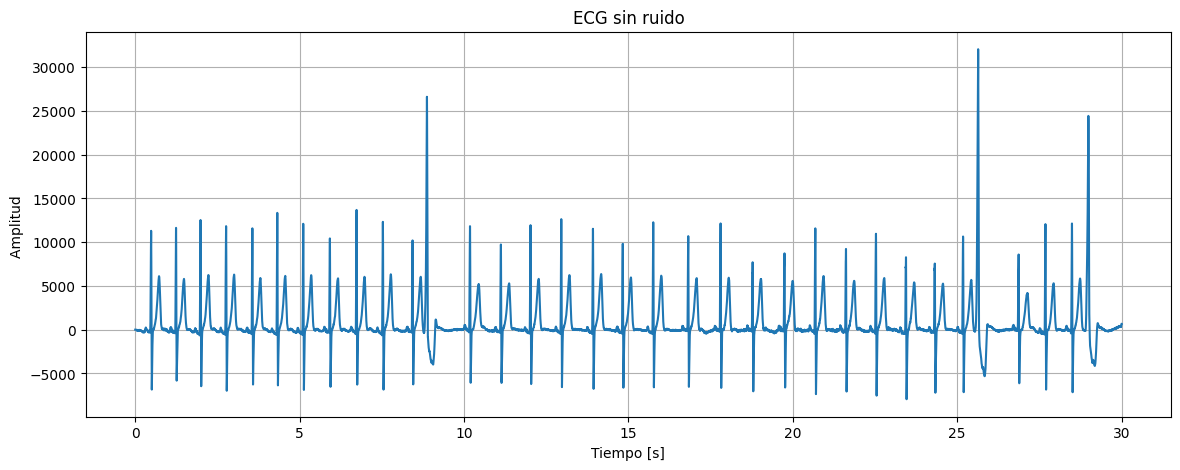

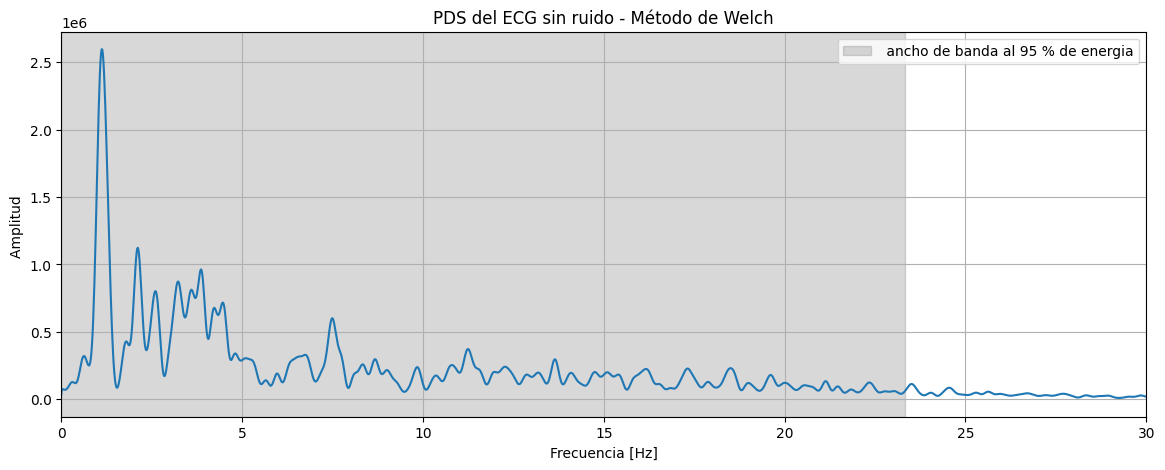

In [72]:
N = len(ecg_one_lead)
t = np.arange(N) / fs_ecg 

cantidad_promedios = 5
nperseg = N // cantidad_promedios
f, Pxx = sig.welch(ecg_one_lead, fs=fs_ecg, nperseg = nperseg, window = 'han', nfft = 2 * N)

total_power = np.sum(Pxx)
cumsum = np.cumsum(Pxx) / total_power

# niveles inferior y superior
percentil = 0.95
#low = (1 - percentil) / 2
low = 0
#high = 1 - low
high =  percentil

# buscar índices
indiceLow = np.searchsorted(cumsum, low)
indiceHigh = np.searchsorted(cumsum, high)

bandWith = f[indiceLow:indiceHigh]

print (f"frecuencia baja: {bandWith[0]:.2f}, frecuencia alta {bandWith[-1]:.2f}")
print (f"ancho de banda {bandWith[-1] - bandWith[0]:.2f}")

tabla_resultados.loc[len(tabla_resultados)] = ["ECG", f"{bandWith[0]:.2f}",f"{bandWith[-1]:.2f}", f"{bandWith[-1]-bandWith[0]:.2f}"]

# Graficar

plt.figure(figsize=(14,5))
plt.plot(t, ecg_one_lead)
plt.title("ECG sin ruido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud ")
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
plt.plot(f, Pxx)
plt.title("PDS del ECG sin ruido - Método de Welch")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud ")
plt.xlim(0,30)
#plt.ylim(0,50)
plt.axvspan(bandWith[0], bandWith[-1],color = "grey", alpha=0.3, label = f" ancho de banda al {percentil *  100:.0f} % de energia")
plt.legend()
plt.grid(True)
plt.show()


frecuencia baja: 0.43, frecuencia alta 4.25
ancho de banda 3.82


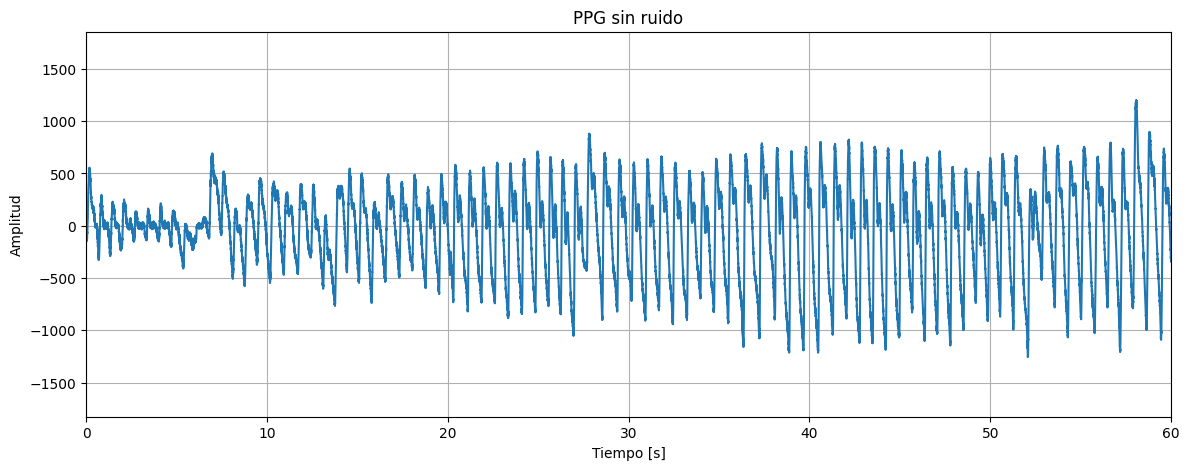

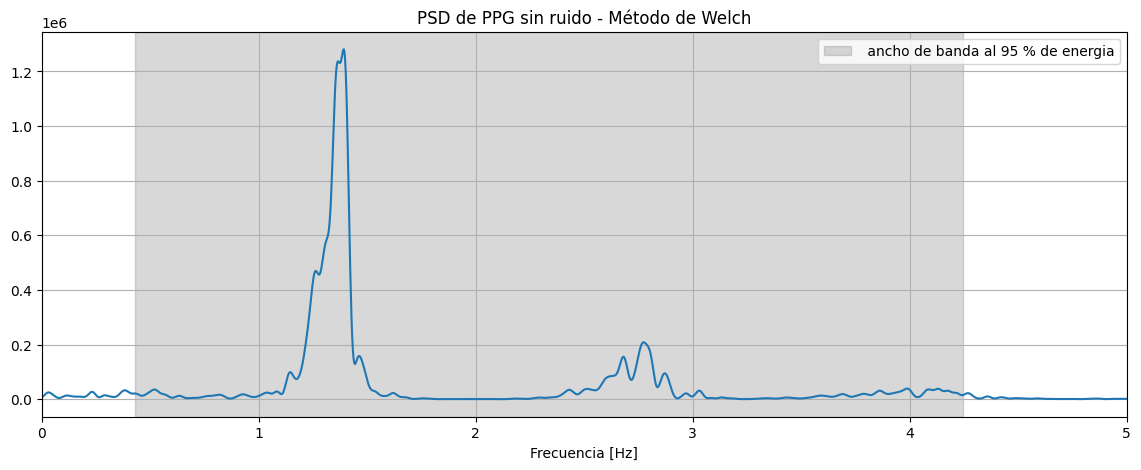

In [68]:

N = len(ppg)
t = np.arange(N) / fs_ppg

cantidad_promedios = 3
nperseg = N // cantidad_promedios
f, Pxx = sig.welch(ppg, fs=fs_ppg, nperseg = nperseg, window = 'hann', nfft = 3 * N)

total_power = np.sum(Pxx)
cumsum = np.cumsum(Pxx) / total_power

# niveles inferior y superior
percentil = 0.95
low = (1 - percentil) / 2
high = 1 - low
#low = 0
#high = percentil

# buscar índices
indiceLow = np.searchsorted(cumsum, low)
indiceHigh = np.searchsorted(cumsum, high)

bandWith = f[indiceLow:indiceHigh]

print (f"frecuencia baja: {bandWith[0]:.2f}, frecuencia alta {bandWith[-1]:.2f}")
print (f"ancho de banda {bandWith[-1] - bandWith[0]:.2f}")

tabla_resultados.loc[len(tabla_resultados)] = ["PPG", f"{bandWith[0]:.2f}",f"{bandWith[-1]:.2f}", f"{bandWith[-1]-bandWith[0]:.2f}"]

# Graficar
#ymin, ymax = plt.ylim()   # límites actuales del eje y
plt.figure(figsize=(14,5))
plt.plot(t, ppg)
plt.xlim(0,60)
plt.title("PPG sin ruido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
plt.plot(f, Pxx)   
plt.xlim(0,5)
plt.title("PSD de PPG sin ruido - Método de Welch")
plt.xlabel("Frecuencia [Hz]")
plt.axvspan(bandWith[0], bandWith[-1],color = "grey", alpha=0.3, label = f" ancho de banda al {percentil *  100:.0f} % de energia")
plt.legend()
plt.grid(True)
plt.show()

frecuencia baja: 1016.83, frecuencia alta 1995.83
ancho de banda 979.00


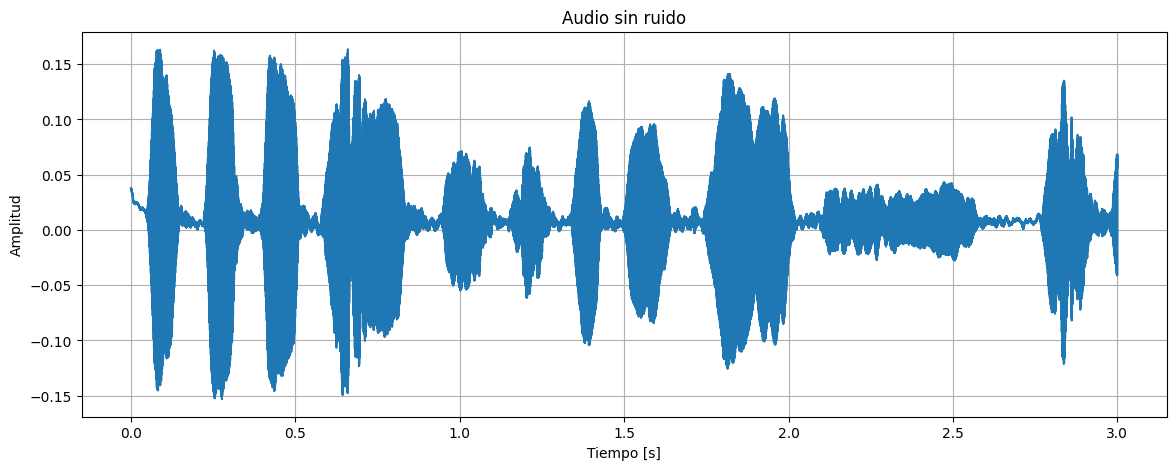

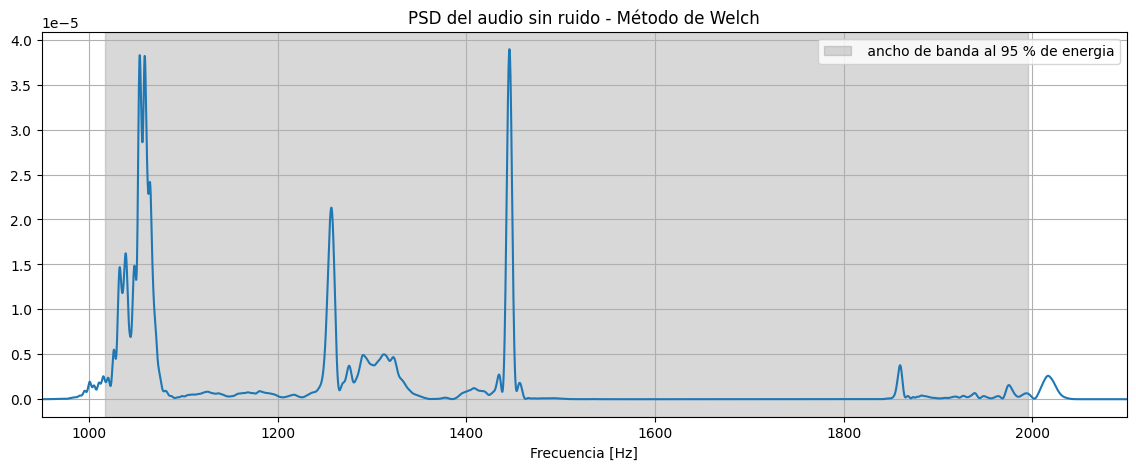

In [74]:
N = len(wav_data)
t = np.arange(N) / fs_audio

cantidad_promedios = 6
nperseg = N // cantidad_promedios
f, Pxx = sig.welch(wav_data, fs=fs_audio, nperseg = nperseg, window = 'blackman', nfft = 2 * N)

total_power = np.sum(Pxx)
cumsum = np.cumsum(Pxx) / total_power

# niveles inferior y superior
percentil = 0.95
low = (1 - percentil) / 2
high = 1 - low

# buscar índices
indiceLow = np.searchsorted(cumsum, low)
indiceHigh = np.searchsorted(cumsum, high)

bandWith = f[indiceLow:indiceHigh]

print (f"frecuencia baja: {bandWith[0]:.2f}, frecuencia alta {bandWith[-1]:.2f}")
print (f"ancho de banda {bandWith[-1] - bandWith[0]:.2f}")

tabla_resultados.loc[len(tabla_resultados)] = ["AUDIO", f"{bandWith[0]:.2f}",f"{bandWith[-1]:.2f}", f"{bandWith[-1]-bandWith[0]:.2f}"]

# Graficar
#ymin, ymax = plt.ylim()   
plt.figure(figsize=(14,5))
plt.plot(t, wav_data)
plt.title("Audio sin ruido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
plt.plot(f, Pxx)   
plt.xlim(950,2100)
plt.title("PSD del audio sin ruido - Método de Welch")
plt.xlabel("Frecuencia [Hz]")
plt.axvspan(bandWith[0], bandWith[-1],color = "grey", alpha=0.3, label = f" ancho de banda al {percentil *  100:.0f} % de energia")
plt.legend()
plt.grid(True)
plt.show()

# Conclusiones

In [61]:
display(tabla_resultados)

,Nombre_Señal,Frecuencia_Min_Hz,Frecuencia_Max_Hz,Ancho_Banda_Hz
0,ECG,0.00,22.77,22.77
1,PPG,0.43,4.25,3.82
2,AUDIO,1010.50,1927.50,917.00


Viendo las estimaciones de densidad espectral de potencia y los resultados de los anchos de banda, pueden observarse ciertas características distintivas de las señales estudiadas. Las primeras dos corresponden a señales médicas asociadas a procesos fisiológicos complejos, por lo que resulta coherente que el orden de magnitud de sus frecuencias sea de apenas unos pocos hertz. En ambas se observa un pico de energía en torno a 1–2 Hz, atribuible al ritmo cardíaco. En contraste, en el caso del audio, el ancho de banda se encuentra naturalmente dentro del rango audible (20 Hz–20 kHz), con una alta concentración de energía en las frecuencias bajas, aproximadamente hasta 200 Hz, coherente con el rango fundamental de la voz humana.

En cuanto al proceso de estimación espectral, el método de Welch ofreció resultados satisfactorios para las tres señales analizadas. Las diferencias entre ellas requirieron seleccionar ventanas y parámetros específicos en cada caso. Para las señales ECG y PPG se empleó la ventana de Hann, dado que proporciona buena atenuación de lóbulos secundarios sin perder tanta resolución espectral, permitiendo distinguir adecuadamente las componentes cercanas en frecuencia. Además, se eligió un número de promedios suficiente para reducir la varianza y obtener un espectro suave, evitando al mismo tiempo perder información relevante. En cambio, para la señal de audio, que cuenta con un ancho de banda es considerablemente mayor y presenta componentes más dispersas en frecuencia, se utilizó la ventana de Blackman, que ofrece una reducción de leakage más efectiva, favoreciendo una representación más limpia del contenido espectral. En todos los casos se aplicó zero padding con el objetivo de mejorar la visualización del espectro, otorgando una grilla de frecuencias más densa sin alterar el contenido espectral real.

Uno de los aspectos centrales del análisis fue el compromiso entre resolución en frecuencia y varianza de la estimación. Los parámetros del método —como la cantidad de promedios y la elección de la ventana— influyen directamente en este equilibrio. Un mayor número de promedios o ventanas más selectivas permiten reducir el leakage y obtener un espectro más suave, disminuyendo la varianza; sin embargo, esto implica una resolución en frecuencia más limitada. Por el contrario, usar menos promedios o ventanas más amplias mejora la resolución y permite identificar picos cercanos, aunque a costa de una mayor variabilidad en la estimación. En este trabajo se priorizó obtener una varianza baja, ya que un espectro demasiado ruidoso dificultaría la interpretación, pero cuidando no suavizar en exceso para evitar perder información espectral relevante. 

Finalmente, los anchos de banda efectivos obtenidos evidencian las diferencias espectrales propias de cada señal analizada. En el caso del ECG, la energía se concentra principalmente en bajas frecuencias (del orden de algunas decenas de hertz), mientras que en la señal PPG el contenido espectral es aún más estrecho. En contraste, la señal de audio presenta una distribución mucho más extendida, con energía significativa hasta frecuencias del orden de los kilohertz. Estos resultados reflejan las particularidades fisiológicas o físicas de cada tipo de señal y validan la capacidad del método de Welch para adaptarse a distintos dominios espectrales.